In [1]:
# Load dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
daily_pB = pd.read_csv('Resources/daily_pB.csv',index_col=False)

In [3]:
daily_pB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2336 entries, 0 to 2335
Data columns (total 5 columns):
datestring                             2336 non-null int64
average_exhaustion                     2336 non-null float64
average_sA                             2336 non-null float64
average_percent_extracted_per_point    2336 non-null float64
pB                                     2336 non-null float64
dtypes: float64(4), int64(1)
memory usage: 91.4 KB


In [4]:
X = daily_pB[['average_exhaustion','average_sA','average_percent_extracted_per_point']]
y = daily_pB['pB'].values.reshape(-1,1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

k: 1, Train/Test Score: 1.000/0.610
k: 3, Train/Test Score: 0.825/0.663
k: 5, Train/Test Score: 0.795/0.692
k: 7, Train/Test Score: 0.772/0.688
k: 9, Train/Test Score: 0.772/0.709
k: 11, Train/Test Score: 0.762/0.723
k: 13, Train/Test Score: 0.764/0.735
k: 15, Train/Test Score: 0.761/0.729
k: 17, Train/Test Score: 0.757/0.731
k: 19, Train/Test Score: 0.756/0.733


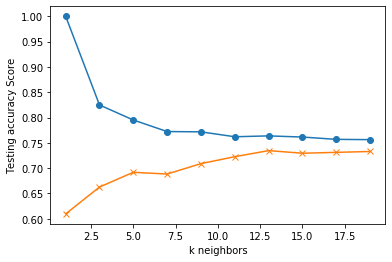

In [6]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
y_ravel = y_train.ravel()
y_train_array = np.array(y_ravel).astype(int)
y_test_ravel = y_test.ravel()
y_test_array = np.array(y_test_ravel).astype(int)
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train_array)
    train_score = knn.score(X_train, y_train_array)
    test_score = knn.score(X_test, y_test_array)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [7]:
# k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train_array)
print('k=13 Test Acc: %.3f' % knn.score(X_test, y_test_array))

k=13 Test Acc: 0.735


In [8]:
# Test the data
new_data = [[60, 0.195, 0.552]]
predicted_pB = knn.predict(new_data)
print(predicted_pB)

[1]


In [9]:
from sklearn import neighbors
model = neighbors.KNeighborsRegressor(n_neighbors = 13)
model.fit(X_train,y_train_array)
training_score = model.score(X_train,y_train_array)
testing_score = model.score(X_test,y_test_array)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
# Note the scores were 0.6136 and 0.5873 for the base model

Training Score: 0.4860792461480238
Testing Score: 0.35620752300068337


KNN implementation did not help, will not pursue KNN for other regressions

In [20]:
# Testing SVR
from sklearn.svm import SVR
X = daily_pB[['average_exhaustion','average_sA','average_percent_extracted_per_point']]
y = np.array(daily_pB['pB'].values.reshape(-1,1).ravel()).astype(int)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [23]:
# there are rbf, linear, and poly options in SVR
model = SVR(kernel='linear')

In [24]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [25]:
grid.fit(X_train, y_train)

C:\Users\Adrianna\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.277, total=   0.9s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.310, total=   0.7s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.251, total=   0.5s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.277, total=   0.9s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.310, total=   0.7s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.251, total=   0.5s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.277, total=   0.9s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.310, total=   0.7s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.251, total=   0.5s
[CV] C=5, gamma=0.0001 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  1.6min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated',
                           kernel='linear', max_iter=-1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [26]:
# List the best parameters for this dataset
print(grid.best_params_)
# List the best score
print(grid.best_score_) #will repeat with the rbf and poly functions

{'C': 5, 'gamma': 0.0001}
0.2817399734141714


In [ ]:
model = SVR(kernel='rbf')
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.001, 0.01, 0.1]}
grid = GridSearchCV(model, param_grid, verbose=3)